**Download** (right-click, save target as ...) this page as a jupyterlab notebook [Lab29](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab29/Lab29.ipynb)

___

# <font color=darkblue>Laboratory 29: Multiple Regression </font>

LAST NAME, FIRST NAME

R00000000

ENGR 1330 Laboratory 29 - In Lab

___


## Example

Explore the data set [heart.data.csv](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab29/heart.data.csv) and determine the effect that the independent variables biking and smoking have on the dependent variable heart disease using a multiple linear regression model.

In [29]:
# Load the necessary packages
import numpy as np
import pandas as pd
import statistics 
import math
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

Get the datafile

In [ ]:
import requests # Module to process http/https requests
remote_url="http://54.243.252.9/engr-1330-webroot/8-Labs/Lab29/heart.data.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('heart.data.csv','wb').write(rget.content); # extract from the remote the contents, assign to a local file same name

Read into a dataframe. The database original source \@ [https://www.scribbr.com/statistics/multiple-linear-regression/](https://www.scribbr.com/statistics/multiple-linear-regression/) does not report the units on each variable, a good guess is **biking** is miles per week, **smoking** is packs per week, and **heart.disease** is possibly hospital admissions per 100000 for coronary complications.


After the read we need some shenigagins to get the column names meaningful.

In [15]:
heartattack = pd.read_csv('heart.data.csv')
data = heartattack.rename(columns={"biking":"Bike","smoking":"Smoke","heart.disease":"Disease"})
data.head(3)

,Unnamed: 0,Bike,Smoke,Disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803


In [ ]:
Now build a linear model

In [17]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Disease ~ Bike + Smoke', data=data)
model = model.fit()
#print(model.summary())
# dir(model) # activate to find attributes
intercept = model.params[0]
slope = model.params[1]
Rsquare = model.rsquared
RMSE = math.sqrt(model.mse_total)

To find the various values a visit to [Here](https://www.statsmodels.org/stable/api.html) is useful!  Below we will construct a title line that contains the equation, RMSE, and R-square using type casting and concatenation, then pass it to the plot.

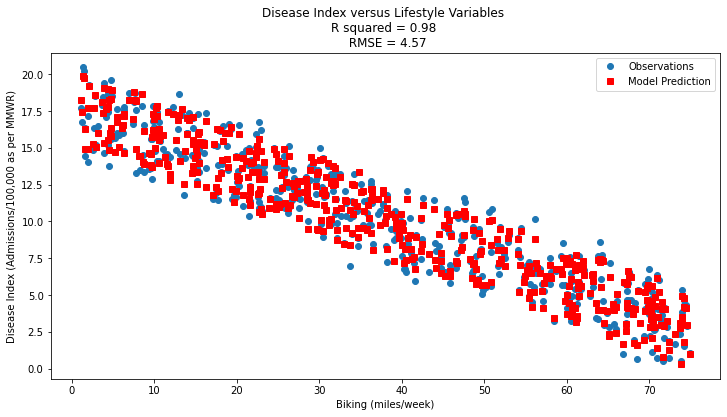

In [27]:
# Predict values
heartfail = model.predict()

titleline = 'Disease Index versus Lifestyle Variables \n'  + 'R squared = ' + str(round(Rsquare,3)) + ' \n RMSE = ' + str(round(RMSE,2))
# Plot regression against actual data - What do we see?
plt.figure(figsize=(12, 6))
plt.plot(data['Bike'], data['Disease'], 'o')           # scatter plot showing actual data
plt.plot(data['Bike'], heartfail, marker = 's' ,color ='r', linewidth=0)   # regression line
plt.xlabel('Biking (miles/week)')
plt.ylabel('Disease Index (Admissions/100,000 as per MMWR)')
plt.legend(['Observations','Model Prediction'])
plt.title(titleline)

plt.show()



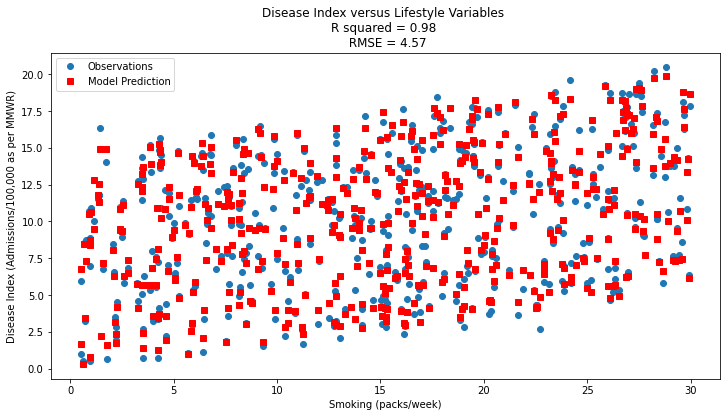

In [26]:
titleline = 'Disease Index versus Lifestyle Variables \n'  + 'R squared = ' + str(round(Rsquare,3)) + ' \n RMSE = ' + str(round(RMSE,2))
# Plot regression against actual data - What do we see?
plt.figure(figsize=(12, 6))
plt.plot(data['Smoke'], data['Disease'], 'o')           # scatter plot showing actual data
plt.plot(data['Smoke'], heartfail, marker = 's' ,color ='r', linewidth=0)   # regression line
plt.xlabel('Smoking (packs/week)')
plt.ylabel('Disease Index (Admissions/100,000 as per MMWR)')
plt.legend(['Observations','Model Prediction'])
plt.title(titleline)

plt.show()

Now lets learn about the actual model

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Disease   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.190e+04
Date:                Sun, 10 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:13:22   Log-Likelihood:                -493.68
No. Observations:                 498   AIC:                             993.4
Df Residuals:                     495   BIC:                             1006.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.9847      0.080    186.988      0.0

<hr>

## Exercise 1

Interpret the results.

1. Is there a correlation with smoking and disease (based on our data)?
2. Is there a correlation with biking and disease (based on our data)?
3. Which is the better lifestyle choice, if the goal is reduced disease?  How much better?
4. Are the parameters significant (i.e. non-zero and zero is not contained in the estimation interval)?

<hr>

## Exercise 2

Using the tools from Lab 28, produce labeled plots of prediction intervals for disease index using biking and smoking as predictor varuables (note the work is already done above, you just need to access the object and make and label the plots)

### Tips:

The data are not ordered, hence we choose to plot only markers even for the models, to get usual plots using lines, you need to sort the fitted results and plot those - its a bit of a hassle and left as a bonus problem.